<a href="https://colab.research.google.com/github/RobertMa05/ADA-Assignment-3/blob/master/ADA_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3: Examination

31005 Advanced Data Analytics

Spring 2019

# Student Name: Xiaoju Ma

# Student ID: 13261185

#### Link to the Github Notebook file: 
https://github.com/RobertMa05/ADA-Assignment-3/blob/master/ADA_Assignment_3.ipynb 

---

##Introduction

In this report, the following questions will be answered:

___Ensemble methods have been very successful in building classiﬁers. The hot topics include how to create diverse classiﬁers and how to fuse the decisions from individual classiﬁers, in particular how to establish the weights that individual classiﬁers contribute to the ensemble’s answer. Describe two existing approaches to solving this problem, discuss their advantages and disadvantages. Make a plan to address one issue or two (related to learning the weights or creating diverse classiﬁers) brieﬂy describe your new method. Explain the reason why the developed method could outperform the conventional ones.___

The report will introduce the background, describe Two Approaches, discuss their advantages and disadvantages. plan and describe a new method and make a comparing of them.


##Background

In real life, we often vote, have meetings, and make more reliable decisions. Similarly, the classification of a single classifier can be error-prone and unreliable, but the reliability is much higher if multiple classifiers vote. Ensemble learning strategically generates some basic models and then strategically combines them to make the final decision.

The general structure of ensemble learning is to produce a set of "individual learners" and then combine them with some strategy. Individual learners are usually generated from training data by an existing learning algorithm, such as C4.5 decision tree algorithm and BP neural network algorithm. At this time, only the same type of individual learners will be included in the ensemble, and such ensemble is "homogeneous". The individual learner in homogeneous ensemble is called "basic learner". It could also include different types of individual learners, such as both decision trees and neural networks. Such ensemble is "heterogeneous". In heterogeneous ensemble, individual learners are generated by different learning algorithms. At this time, there is no basic learning algorithm. Individual learners are generally not called basic learners, but "component learners" or directly called individual learners.

In supervised learning algorithms of machine learning, our goal is to learn a stable model that performs well in all aspects, but the actual situation is often not so ideal, and sometimes we can only get multiple preferred models (weakly supervised models that perform better in some aspects). Integrated learning is to combine multiple weak supervised models here in order to get a better and more comprehensive strong supervised model. The underlying idea of ensemble learning is that even if one weak classifier gets the wrong prediction, other weak classifiers can correct the error, that is, the weights of the ensemble’s answer.


According to different individual learning of generation, the current ensemble approaches of learning can be roughly divided into two categories. The first is a strong dependency between individual learning, a series of individual learning basic require the serialization of serial generated approaches, the Boosting algorithm is one of them. The second is the individual learning, there is no strong dependence relationship between a series of individual learning can be generated in parallel, such as Bagging and Random Forest. Here I will describe two approaches, Boosting and Bagging.


##Describe Two Approaches

###Boosting

Boosting is a machine learning algorithm that can be used to reduce bias in supervised learning. It learns a series of weak classifiers and combines them into a strong classifier. 


The representative algorithm is AdaBoost (Adaptive Boosting). First, the training data are distributed to each learner, before learning, the same weight is assigned to each sample. After the first learner predicted, the next one picked the worst samples that the previous one had judged, or the hardest ones, and gave them a bigger weight. Then iterate through them. This allows the later learner to focus more and more on the ones that were predicted wrong. Then, the prediction results of each classifier are integrated, and the weighted average is adopted to give higher weight to the learner with higher power, which has a lower error rate.

![Boosting](https://github.com/RobertMa05/ADA-Assignment-3/blob/master/Boosting.png?raw=true)

###Bagging

The principle of bagging algorithm is different from boosting. Its weak learners have no dependence on each other and can be generated in parallel.
In bagging, the training dataset of individual weak learner is obtained by random sampling. Through random sampling for several times, we can obtain several sampling sets. For these three sampling sets, we can independently train several weak learners, and then obtain the final strong learners through collection strategy for these three weak learners.

The random sampling here is using bootstrap which is a useful statistical method of estimation, for n samples of the original training set, every time we grab a first sample in the sample set, and then put the samples back, that is, the next time sampling the sample could still be collected, this collection of n times, finally can get n samples of the sample set, due to the random sampling, each sample set is different from the original training set, and other sample sets are also different, so get a number of different weak learning. By re-sampling, bootstrap avoids the problem of sample reduction caused by cross-validation. Secondly, bootstrap can also create randomness of data.

![Bagging](https://github.com/RobertMa05/ADA-Assignment-3/blob/master/Bagging.png?raw=true)

##Discuss their Advantages and Disadvantages.

###Comparing Two Approaches

Bagging and boosting both adopt sample, then learning, then combination, but there are some tiny differences.

In terms of construction of the model,  each training dataset is not correlated with each other in Bagging, that is, each base classifier is not correlated with each other. the training dataset in boosting needs to be adjusted on the results of the previous round, which also makes it unable to conduct parallel computation. 

In terms of error reduction, bagging focuses on the combination of weights of multiple base models to ensure the stability of the model. Therefore, each base model should be relatively complex to reduce the bias (for example, the depth each decision tree is very deep). For the strategy of boosting, on the other hand, is to reduce the deviations of the previous round in each learning. Therefore, on the basis of guaranteeing the deviations, it is necessary to simplify each base classifier to make the variance smaller.

|  |Boosting|Bagging|
|---|---|---|
|Construction|serial|parallel|
|Training set|dependent|independent|
|Effect|reduced bias|reduced variance|

The error model can be decomposed into Total Error, Bia and Variance.

* Bia refers to the error that the algorithm cannot learn the target.
* Variance is the error from the sampling.

![Error Model](https://github.com/RobertMa05/ADA-Assignment-3/blob/master/Error%20Model.png?raw=true)

For models with high bias, boosting method is recommended to reduce the bias, while bagging method is not recommended. Conversely, for models with high variance, bagging method is recommended to reduce the variance, while boosting method is not recommended. Furthermore, both methods can reduce the influence of noise.



###Boosting


####Advantages

* Good performance. 
* Reduce the bias, Reduce the effect of noise.
* Directly optimize the loss function.

####Disdvantages

* Overfitting occurs.
* Need to find a suitable algorithm as the termination condition.
* More parameters, it is more difficult to adjust parameters.
* When the number of trees used for ensemble is large, the results are less interpretable.

###Bagging

####Advantages

* Reduce the variance, reduce the impact of noise, avoid overfitting.
* Ensemble can be done with a small number of default parameters and requires less call parameters.
* runs faster, reduce time wasting.
* Have the same advantages as CART, such as handling missing values, automatically selecting the importance of variables, and adapting to strong nonlinearity.

####Disdvantages

* The time elapsed longer as complexity increases.
* When the number of trees used for ensemble is large, the results are less interpretable.


###Visually Comparing

In order to intuitively observe and explain the differences between the two approaches，scikit-learn machine learning libraries has been used to establish two types of ensemble modeling，BaggingClassifier and AdaBoostClassifier,The c4.5 decision tree is used as the weak learner, iris dataset is loaded from scikit-learn datasets to test the models.

In [0]:
# Load scikit-learn libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
#load iris dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score

from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import time

In [0]:
#we use iris dataset to test the models
#first two column as the feature
irisDataset = load_iris()
x = irisDataset.data[:,:2]
y = irisDataset.target

In [0]:
#weak learner as decision tree, depth of the tree as 2
decisionTree = DecisionTreeClassifier(criterion='entropy', max_depth=2)
# bagging the weak leaner, set the number of the learner as 30
bagging = BaggingClassifier(base_estimator=decisionTree, n_estimators=30, random_state=7, max_samples=3, max_features=2)
# boosting the weak leaner, set the number of the learner as same as bagging
adaboost  = AdaBoostClassifier(base_estimator=decisionTree, n_estimators=30)

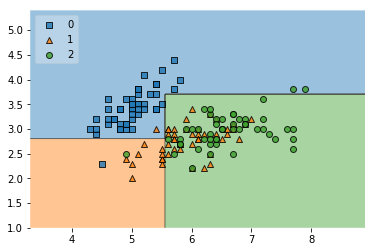

Accuracy: 0.68 Time elapsed: 0.009


In [167]:
#count the time elapsed, check the accuracu and plot the decisionTree model
TimeStart = time.time()
scoring = cross_val_score(decisionTree, x, y, cv=4, scoring='accuracy')
decisionTree.fit(x, y)
TimeEnd = time.time()
fig = plot_decision_regions(X=x, y=y, clf=decisionTree, legend=2)
plt.show()
print ("Accuracy: %.2f Time elapsed: %.3f"%(scoring.mean(), TimeEnd-TimeStart)) 

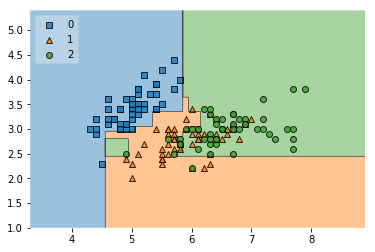

Accuracy: 0.70 Time elapsed: 0.154


In [169]:
#count the time elapsed, check the accuracu and plot the adaboosting model
TimeStart = time.time()
scoring = cross_val_score(adaboost, x, y,cv=4, scoring='accuracy')
adaboost.fit(x, y)
TimeEnd = time.time()
fig = plot_decision_regions(X=x, y=y, clf=adaboost, legend=2)
plt.show()
print ("Accuracy: %.2f Time elapsed: %.3f"%(scoring.mean(), TimeEnd-TimeStart)) 

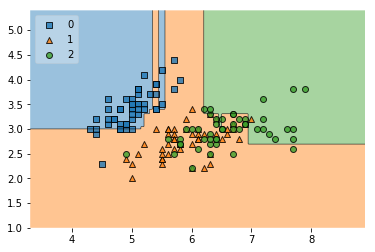

Accuracy: 0.73 Time elapsed: 0.123


In [168]:
#count the time elapsed, check the accuracu and plot the bagging model
TimeStart = time.time()
scoring = cross_val_score(bagging, x, y, cv=4, scoring='accuracy')
bagging.fit(x, y)
TimeEnd = time.time()
fig = plot_decision_regions(X=x, y=y, clf=bagging, legend=2)
plt.show()
print ("Accuracy: %.2f Time elapsed: %.3f"%(scoring.mean(), TimeEnd-TimeStart)) 

By observing the three sets of outputs, the adaboosting model showed low bias, and almost all the corresponding points fell in the corresponding areas, but over-fitting is likely occurred. As the number of trees used for ensemble increased, the interpretability of the results became worse. 

The bagging model appears to reduce the variance and shows high bias, especially in feature 2. It runs faster than the adaboosting model. Same as the adaboosting model, with the large number of trees used for ensemble, the interpretability of the results becomes worse.

![Bias and Variance](https://github.com/RobertMa05/ADA-Assignment-3/blob/master/Bias%20and%20Variance.png?raw=true)

##Plan and Describe a new method

##Comparing with the conventional ones

##Conclusion

##References